https://www.dicoding.com/academies/184/tutorials/8527
- Pada latihan kali ini kita akan membuat sebuah model untuk mengklasifikasi gambar sebuah kamar dan memprediksi apakah kamar tersebut rapi atau berantakan.
- Tahapan latihan kali ini adalah:
 1. Memastikan TensorFlow yang digunakan di Google Colab adalah versi di atas 2.0.
 2. Mengunduh dataset dan melakukan extract file dengan metode unzip.
 3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
 4. Pre-processing data dengan image augmentation.
 5. Mempersiapkan data latih yang akan dipelajari oleh model.
 6. Membangun arsitektur model dengan Convolutional Neural Network (CNN).
 7. Compile dan latih model dengan model.compile dan model.fit hingga   mendapatkan akurasi yang diinginkan.
 8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.

In [15]:
# Memastikan versi Tensorflow 2 ke atas
import tensorflow as tf
print(tf.__version__)

2.7.0


In [16]:
# Mengunduh dataset
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-12-01 14:32:39--  https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip [following]
--2021-12-01 14:32:39--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pemula_academy/messy-vs-clean-room.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   152MB/s    in 0.4s    

2021-12-01 14:32:39 

In [17]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# mendefinisikan nama direktori untuk data latih dan data validasi
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [18]:
# Memperhatikan direktori data latih
os.listdir('/tmp/images/train')

['clean', 'messy']

In [19]:
# Memperhatikan direktori data validasi
os.listdir('/tmp/images/val')

['clean', 'messy']

In [29]:
# membuat direktori ruangan rapi pada direktori data training
train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [30]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- ImageDataGenerator merupakan sebuah fungsi yang sangat berguna untuk mempersiapkan data latih dan data validasi. Beberapa kemudahan yang disediakan ImageDataGenerator antara lain, preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.

- Augmentasi gambar merupakan sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar yang telah ada dengan menambahkan variasi tertentu. 

In [31]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [32]:
# ======================= siapkan data latih dan validasi dari kumpulan data gambar yang di-load dalam memori melalui fungsi flow() ================================

train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='binary') # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='binary') # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


- fungsi dari layer konvolusi adalah untuk mengekstraksi atribut pada gambar.    
- layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan model lebih cepat. 

In [34]:
# Membangun arsitektur model dengan Convolutional Neural Network (CNN).
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), # Input_shape sendiri adalah resolusi dari gambar-gambar pada data latih
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # Mengunakan aktivasi sigmoid karena masalah 2 kelas, jika lebih dari 2 kelas bisa menggunakan softmax. Merupakan output layer
])  # output terakhir diset 1 karena hasilnya merupakan angka tunggal 0 - 1

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [35]:
# memanggil fungsi compile pada model dan menspesifikasikan optimizer dan loss function. Untuk propagasi balik (Back Propagation)
model.compile(loss='binary_crossentropy',
              optimizer='adam', # Adam optimizer dipilih karena mudah diterapkan, lebih efisien secara komputasi dan kebutuhan memori yang lebih kecil.
              metrics=['accuracy'])

In [36]:
# latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 3s - loss: 0.6950 - accuracy: 0.4800 - val_loss: 0.6621 - val_accuracy: 0.6500 - 3s/epoch - 103ms/step
Epoch 2/25
25/25 - 1s - loss: 0.6539 - accuracy: 0.6600 - val_loss: 0.6610 - val_accuracy: 0.5000 - 1s/epoch - 53ms/step
Epoch 3/25
25/25 - 1s - loss: 0.7136 - accuracy: 0.5800 - val_loss: 0.6514 - val_accuracy: 0.8000 - 1s/epoch - 51ms/step
Epoch 4/25
25/25 - 1s - loss: 0.6187 - accuracy: 0.7000 - val_loss: 0.6335 - val_accuracy: 0.7000 - 1s/epoch - 50ms/step
Epoch 5/25
25/25 - 1s - loss: 0.6035 - accuracy: 0.6600 - val_loss: 0.5563 - val_accuracy: 0.8000 - 1s/epoch - 51ms/step
Epoch 6/25
25/25 - 1s - loss: 0.6752 - accuracy: 0.6600 - val_loss: 0.5997 - val_accuracy: 0.7500 - 1s/epoch - 50ms/step
Epoch 7/25
25/25 - 1s - loss: 0.6127 - accuracy: 0.7300 - val_loss: 0.5289 - val_accuracy: 0.7500 - 1s/epoch - 52ms/step
Epoch 8/25
25/25 - 1s - loss: 0.5912 - accuracy: 0.6800 - val_loss: 0.4548 - val_accuracy: 0.7500 - 1s/epoch - 51ms/step
Epoch 9/25
25/25 - 1s - loss: 0

Saving f555ef6f6bf2dc6dd06ef3e123b24c9e.jpg to f555ef6f6bf2dc6dd06ef3e123b24c9e.jpg
f555ef6f6bf2dc6dd06ef3e123b24c9e.jpg
clean


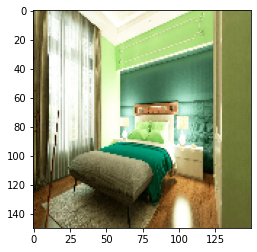

In [40]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded= files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')